# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](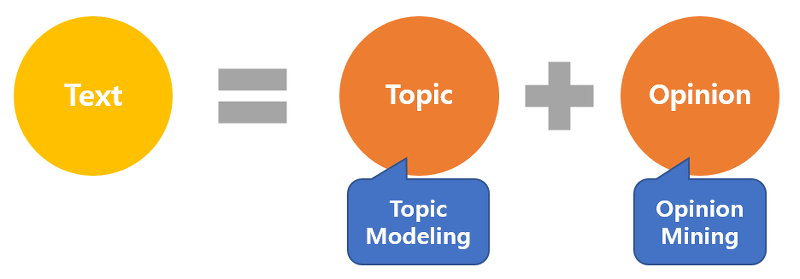)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + 감정 어휘 사전을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


In [1]:
!pip install afinn

     |████████████████████████████████| 61kB 3.0MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53453 sha256=c930d52d1097101cefdef16fb1167cc369d6e84cd090b3ae5473f4ac906cbf94
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


### 데이터 준비

1.   사용할 데이터를 구성 
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset = 'train') # 학습이 아니니까 train만 가져와볼게
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

In [3]:
from afinn import Afinn

afinn = Afinn()
for i in range(10):
    print(afinn.score(newsdata.data[i]))    # 감정이 몇점인지 나오지?
    

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



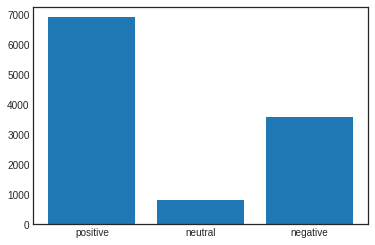

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

positive = 0
neutral = 0
negative = 0

for i in newsdata.data:             # 긍정,중간,부정이 몇개인지 세어보는거지
    score = afinn.score(i)
    if score > 0 :
        positive += 1
    elif score == 0:
        neutral += 1
    else:
        negative += 1

plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative'])   # 그래프로 나타내어주고
plt.show()

# 기사는 자극적으로 쓰니까 보통 양극화된 특성을 가지지


## 기계학습을 이용한 감정 분석

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [7]:
!set -x \
&& pip install konlpy \ # 한국 자여어처리 konlpy
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x    # 한국 형태로 분석기 mecab

+ pip install konlpy
     |████████████████████████████████| 19.4MB 61.4MB/s 
     |████████████████████████████████| 92kB 12.3MB/s 
     |████████████████████████████████| 460kB 57.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/ls

In [9]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [16]:
# 스크래핑 안하고 영화 리뷰 잘 만든거 다운로드해올게

train_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
test_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data[:10]

id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
5   5403919      막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.      0
6   7797314                              원작의 긴장감을 제대로 살려내지못했다.      0
7   9443947  별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...      0
8   7156791                             액션이 없는데도 재미 있는 몇안되는 영화      1
9   5912145      왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?      1

#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



In [17]:
print(train_data['document'].nunique()) 
print(train_data['label'].nunique())

# label은 2개
# 146182개의 갯수의 데이터

146182
2


In [18]:
# 불필요한것들을 빼자

train_data.drop_duplicates(subset=['document'], inplace = True) # 1.중복을 제거해주고

print(train_data.isnull().sum())

train_data = train_data.dropna(how='any')   # 2. 마냑 null잇으면 지워주 

id          0
document    1
label       0
dtype: int64


#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [19]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')   # ㄱ~ㅎ, ㅏ~ㅣ, 가~힣, space bar
train_data[:10]

id                                           document  label
0   9976970                                  아 더빙 진짜 짜증나네요 목소리      0
1   3819312                         흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                          교도소 이야기구먼 솔직히 재미는 없다평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...      1
5   5403919              막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움      0
6   7797314                               원작의 긴장감을 제대로 살려내지못했다      0
7   9443947  별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...      0
8   7156791                             액션이 없는데도 재미 있는 몇안되는 영화      1
9   5912145          왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나      1

In [20]:
train_data['document'].replace('', np.nan, inplace = True)  # nan값을 replace로 지정
print(len(train_data))
print(train_data.isnull().sum())   

 # 갯수 체크해볼게 391개나 있네 / 이걸 제거하자


146182
id            0
document    391
label         0
dtype: int64


In [21]:
#정규표현식으로 제거를 하니까
# 성의없는 ㅋㅋ나 이런 아무 의미없는 리뷰는 다 nan이 된거지
# 이 391개도 다시 지워주자

train_data = train_data.dropna(how='any')
print(len(train_data))

# 제거가 391개만큼 됐구만

145791


In [22]:
# test_Data도 마찬가지로 전처리 다 해주자

test_data.drop_duplicates(subset = ['document'], inplace = True)
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
test_data['document'].replace('', np.nan, inplace = True) 
test_data = test_data.dropna(how = 'any')

#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [23]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 훨씬 많겠지만 일단 이걸로

In [24]:
mecab = Mecab()

X_train = []
for sentence in train_data['document']:
    X_train.append([word for word in mecab.morphs(sentence) if not word in stopwords])  # 형태소 둘려주고 금지어 까지 걸러야지


In [27]:
# print(X_train[:3])
X_train[:3]


[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'],
 ['너무', '재', '밓었다그래서보는것을추천한다']]

In [28]:
#test_Data에 대해서도 똑같이 금지어 ,토큰화 해주자

# mecab = Mecab()

X_test = []
for sentence in test_data['document']:
    X_test.append([word for word in mecab.morphs(sentence) if not word in stopwords])

In [29]:
tokenizer = Tokenizer() # tokenizer정의해서

tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)     # index를 붙여주자

{'영화': 1, '다': 2, '고': 3, '하': 4, '을': 5, '보': 6, '게': 7, '지': 8, '있': 9, '없': 10, '좋': 11, '나': 12, '었': 13, '만': 14, '는데': 15, '너무': 16, '봤': 17, '적': 18, '안': 19, '정말': 20, '로': 21, '것': 22, '음': 23, '아': 24, '네요': 25, '어': 26, '재밌': 27, '지만': 28, '같': 29, '진짜': 30, '에서': 31, '했': 32, '기': 33, '네': 34, '않': 35, '점': 36, '거': 37, '았': 38, '수': 39, '되': 40, '면': 41, 'ㅋㅋ': 42, '인': 43, '말': 44, '연기': 45, '주': 46, '최고': 47, '내': 48, '평점': 49, '이런': 50, '던': 51, '어요': 52, '할': 53, '왜': 54, '겠': 55, '스토리': 56, '해': 57, 'ㅋㅋㅋ': 58, '습니다': 59, '듯': 60, '아니': 61, '드라마': 62, '생각': 63, '더': 64, '그': 65, '싶': 66, '사람': 67, '때': 68, '감동': 69, '배우': 70, '함': 71, '본': 72, '까지': 73, '뭐': 74, '알': 75, '만들': 76, '내용': 77, '볼': 78, '보다': 79, '감독': 80, '라': 81, '재미': 82, '그냥': 83, '시간': 84, '지루': 85, '중': 86, '재미있': 87, '였': 88, '잼': 89, '년': 90, '사랑': 91, '못': 92, '재미없': 93, '냐': 94, '쓰레기': 95, '서': 96, '라고': 97, '니': 98, '면서': 99, '다시': 100, '번': 101, '나오': 102, '하나': 103, '작품': 104, '야': 105, '이거': 1

In [30]:
tokenizer.word_index

{'영화': 1,
 '다': 2,
 '고': 3,
 '하': 4,
 '을': 5,
 '보': 6,
 '게': 7,
 '지': 8,
 '있': 9,
 '없': 10,
 '좋': 11,
 '나': 12,
 '었': 13,
 '만': 14,
 '는데': 15,
 '너무': 16,
 '봤': 17,
 '적': 18,
 '안': 19,
 '정말': 20,
 '로': 21,
 '것': 22,
 '음': 23,
 '아': 24,
 '네요': 25,
 '어': 26,
 '재밌': 27,
 '지만': 28,
 '같': 29,
 '진짜': 30,
 '에서': 31,
 '했': 32,
 '기': 33,
 '네': 34,
 '않': 35,
 '점': 36,
 '거': 37,
 '았': 38,
 '수': 39,
 '되': 40,
 '면': 41,
 'ㅋㅋ': 42,
 '인': 43,
 '말': 44,
 '연기': 45,
 '주': 46,
 '최고': 47,
 '내': 48,
 '평점': 49,
 '이런': 50,
 '던': 51,
 '어요': 52,
 '할': 53,
 '왜': 54,
 '겠': 55,
 '스토리': 56,
 '해': 57,
 'ㅋㅋㅋ': 58,
 '습니다': 59,
 '듯': 60,
 '아니': 61,
 '드라마': 62,
 '생각': 63,
 '더': 64,
 '그': 65,
 '싶': 66,
 '사람': 67,
 '때': 68,
 '감동': 69,
 '배우': 70,
 '함': 71,
 '본': 72,
 '까지': 73,
 '뭐': 74,
 '알': 75,
 '만들': 76,
 '내용': 77,
 '볼': 78,
 '보다': 79,
 '감독': 80,
 '라': 81,
 '재미': 82,
 '그냥': 83,
 '시간': 84,
 '지루': 85,
 '중': 86,
 '재미있': 87,
 '였': 88,
 '잼': 89,
 '년': 90,
 '사랑': 91,
 '못': 92,
 '재미없': 93,
 '냐': 94,
 '쓰레기': 95,
 '서': 96,
 '라고'

#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [32]:
threshold = 3   # 3개 미만, 제거

words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key,value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:   # htreshold보다 작으면 rare한걸로카운터 치자
        rare_cnt += 1
        rare_freq = rare_freq + value

print('전체 단어 수 : ', words_cnt)
print('빈도가 {} 이하인 희귀단어 수: {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율: {}'.format((rare_cnt / words_cnt)*100))
print('희귀 단어 등장 빈도 비율: {}'.format((rare_freq / words_freq)* 100))

#56퍼나 되는 , threshold보다 작은게 56퍼야
# 이런건 제거해주는게 좋겠대

전체 단어 수 :  49946
빈도가 2 이하인 희귀단어 수: 28320
희귀 단어 비율: 56.70123733632323
희귀 단어 등장 빈도 비율: 1.7606788534131563


In [33]:
vocab_size = words_cnt -rare_cnt +2 # 0번째 padding이랑 , out of token넣어줘야하니까
print(vocab_size)

21628


In [34]:
tokenizer = Tokenizer(vocab_size, oov_token= 'OOV')
tokenizer.fit_on_texts(X_train) # 그럼 조종된 vocabsize만 불러오겟지
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [35]:
# y값 labe 도 넣어줘야겟지
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])


In [36]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

# sentence 갯수가 몇개 안되는것도 제거해주자
# if 0개, 즉 비어있는것도 지워주자
# 왜 전처리하면서 비워진거 있을거야니야 그거 지워주자


X_train = np.delete(X_train, drop_train, axis = 0)
y_train = np.delete(y_train, drop_train, axis = 0)

print(len(X_train))
print(len(y_train))

# 145791원랜 이값이였는데 또 줄었지?

145380
145380


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



In [37]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이', sum(map(len, X_train)) / len(X_train))  # Xtrain의 len을 더해주고 나눠저서 평균


리뷰 최대 길이: 83
리뷰 평균 길이 13.80136194799835


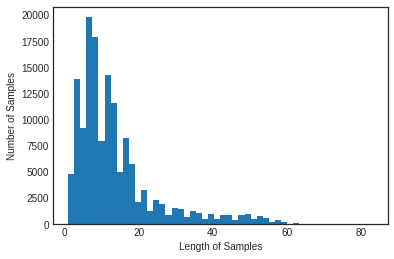

In [38]:
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

# 분포도가 83까지 있지만
# 음.. 60까지만 짤라도 분포에 크게영향 없을거같긴해


In [39]:
max_len = 60

In [40]:
X_train = pad_sequences(X_train,maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# padding해줬어!

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [41]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [45]:
vocab_size

21628

In [43]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         2162800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,280,177
Trainable params: 2,280,177
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train, y_train, epochs = 15,
                    batch_size = 60, validation_split = 0.2)

Epoch 1/15
1939/1939 [==============================] - 31s 16ms/step - loss: 0.3907 - acc: 0.8242 - val_loss: 0.3472 - val_acc: 0.8472
Epoch 2/15
1939/1939 [==============================] - 30s 16ms/step - loss: 0.3196 - acc: 0.8626 - val_loss: 0.3206 - val_acc: 0.8611
Epoch 3/15
1939/1939 [==============================] - 30s 15ms/step - loss: 0.2924 - acc: 0.8769 - val_loss: 0.3186 - val_acc: 0.8653
Epoch 4/15
1939/1939 [==============================] - 30s 15ms/step - loss: 0.2717 - acc: 0.8880 - val_loss: 0.3145 - val_acc: 0.8641
Epoch 5/15
1939/1939 [==============================] - 31s 16ms/step - loss: 0.2547 - acc: 0.8962 - val_loss: 0.3148 - val_acc: 0.8686
Epoch 6/15
1939/1939 [==============================] - 29s 15ms/step - loss: 0.2387 - acc: 0.9043 - val_loss: 0.3188 - val_acc: 0.8662
Epoch 7/15
1939/1939 [==============================] - 30s 15ms/step - loss: 0.2224 - acc: 0.9121 - val_loss: 0.3226 - val_acc: 0.8647
Epoch 8/15
1939/1939 [==========================

In [48]:
model.evaluate(X_test, y_test)

# overfitting이 심하지만 그래도
# 0.84퍼 나왔네

1532/1532 [==============================] - 5s 3ms/step - loss: 0.5236 - acc: 0.8438


[0.5235862731933594, 0.8438411951065063]

#### 시각화

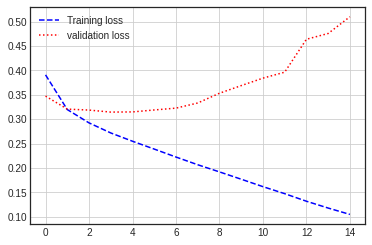

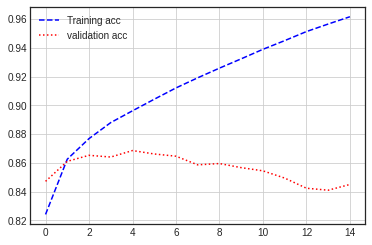

In [50]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label = 'Training loss')
plt.plot(val_loss, 'r:', label = 'validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label = 'Training acc')
plt.plot(val_acc, 'r:', label = 'validation acc')
plt.legend()
plt.grid()

plt.show()

# 음 overfitting이 많이 튀는구만

#### 감정 예측

In [51]:
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen = max_len)
    score = float(model.predict(new_pad))

    if score > 0.5:
        print('{} -> 긍정({:.2f}%)'.format(new_sentence, score*100))
    else:
        print('{} -> 부정({:.2f}%)'.format(new_sentence, (1-score)*100))

In [61]:
sentiment_predict('정말 재밌고 흥미진진했음')
sentiment_predict('ㄹㅇ핵노잼 ㅋㅋ')
sentiment_predict('생각보다 볼만한듯')
sentiment_predict('잉 기무릥ㅋ')
sentiment_predict('돈주고보는사람없제?')
sentiment_predict('ㄹㅇ핵노잼ㅋㅋ')

정말 재밌고 흥미진진했음 -> 긍정(98.97%)
ㄹㅇ핵노잼 ㅋㅋ -> 긍정(54.73%)
생각보다 볼만한듯 -> 긍정(96.75%)
잉 기무릥ㅋ -> 긍정(76.56%)
돈주고보는사람없제? -> 부정(99.16%)
ㄹㅇ핵노잼ㅋㅋ -> 부정(50.22%)


### 네이버 쇼핑 리뷰 데이터

* 참고: https://wikidocs.net/94600

#### 데이터 로드

In [63]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt', filename = 'shopping.txt')


('shopping.txt', <http.client.HTTPMessage at 0x7fb9c405c6d8>)

In [65]:
total_data = pd.read_table('shopping.txt', names=['ratings', 'reviews'])
print(len(total_data))

# 음 20만개라 성게망게 후후

200000


In [66]:
total_data[:10]

ratings                                            reviews
0        5                                            배공빠르고 굿
1        2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2        5  아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3        2  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4        5                  민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5        2  비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6        1  주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7        2                          넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8        2                          보폴이 계속 때처럼 나오다가 지금은 안나네요~
9        2  110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...

#### 훈련 데이터와 테스트 데이터 분리

In [67]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default = 0) 

# 0,1로 바꿔주는 작업을 한거지
# 3 초과인 값만 1로 나머지는 0으로 기본값


In [68]:
total_data[:10]

ratings                                            reviews  label
0        5                                            배공빠르고 굿      1
1        2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고      0
2        5  아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...      1
3        2  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...      0
4        5                  민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ      1
5        2  비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...      0
6        1  주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...      0
7        2                          넉넉한 길이로 주문했는데도 안 맞네요 별로예요      0
8        2                          보폴이 계속 때처럼 나오다가 지금은 안나네요~      0
9        2  110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...      0

In [72]:
print(total_data['ratings'].nunique(), 
total_data['reviews'].nunique(),
total_data['label'].nunique())

# 유니크니까 중복은 당ㅇ연히 1개로세지만
# 원본데이터는 그대로니까
# 아래처럼해줘야 진짜 전처리가 되는거지


4 199908 2


In [74]:
# 전처리를 좀해주자
total_data.drop_duplicates(subset = ['reviews'], inplace = True)    #중복제거
print(len(total_data))

# 98개 줄음

199908


In [75]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(total_data,test_size = 0.25, random_state = 111)
print(len(train_data))
print(len(test_data))

149931
49977


#### 레이블의 분포 확인

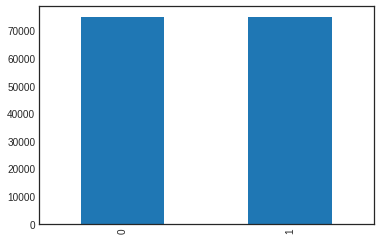

In [77]:
train_data['label'].value_counts().plot(kind = 'bar')

# label의 분포도를 보자!
# 거의 반반이구만

In [78]:
# 그럼 정확하게 한번 볼까?

train_data.groupby('label').size().reset_index(name = 'count')

# count로 이름 바꿔서 자세하기 확인해볼게

label  count
0      0  74974
1      1  74957

#### 데이터 정제

In [80]:
train_data['reviews'] = train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
train_data['reviews'].replace('', np.nan, inplace = True)
print(len(train_data))

# 음 갯수가 그대로구만 일단 확인

149931


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [81]:
# test데이터도 한번 전처리 해줘야지
test_data.drop_duplicates(subset = ['reviews'], inplace = True) 
test_data['reviews'] = test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
test_data['reviews'].replace('', np.nan, inplace = True)
print(len(test_data))

# 49977개라

49977


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

#### 토큰화 및 불용어 제거

* 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [82]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']


In [83]:
mecab = Mecab()
train_data['reviews'] = train_data['reviews'].apply(mecab.morphs)
train_data['reviews'] = train_data['reviews'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
#test도 해줘야지
test_data['reviews'] = test_data['reviews'].apply(mecab.morphs)
test_data['reviews'] = test_data['reviews'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
X_train = train_data['reviews'].values
y_train = train_data['label'].values
X_test = test_data['reviews'].values
y_test = test_data['label'].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(149931,)
(149931,)
(49977,)
(49977,)


#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [89]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [90]:
threshold = 3   # 3개 미만, 제거

words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key,value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:   # htreshold보다 작으면 rare한걸로카운터 치자
        rare_cnt += 1
        rare_freq = rare_freq + value

print('전체 단어 수 : ', words_cnt)
print('빈도가 {} 이하인 희귀단어 수: {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율: {}'.format((rare_cnt / words_cnt)*100))
print('희귀 단어 등장 빈도 비율: {}'.format((rare_freq / words_freq)* 100))

# 영화에 비해서 쇼핑이 좀더 ..?

전체 단어 수 :  40060
빈도가 2 이하인 희귀단어 수: 23110
희귀 단어 비율: 57.688467299051425
희귀 단어 등장 빈도 비율: 1.2179012469227228


In [91]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

16952


In [94]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)  # sequences로 바꿔서 변환할게

In [96]:
X_train[:2]
# 예시함 볼까

[[5405, 3, 258, 15, 1424, 102],
 [86,
  108,
  263,
  98,
  10,
  26,
  17,
  2,
  612,
  275,
  208,
  560,
  1566,
  3188,
  1573,
  344,
  212,
  264,
  561,
  738,
  1205,
  80,
  38,
  148,
  139,
  5555,
  1610,
  98,
  542,
  49,
  58,
  5054,
  2,
  77]]

In [97]:
X_test[:2]

[[12, 71, 2, 45, 346, 73, 24, 23, 4606, 243, 2],
 [978, 2245, 2780, 725, 730, 9, 103, 53, 19, 49, 85]]

#### 패딩

In [ ]:
# 길이를 몇으로할까


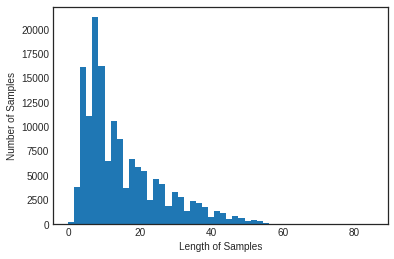

In [98]:
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

# 이것도 한 60으로

In [99]:
max_len = 60

In [100]:
X_train = pad_sequences(X_train,maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# padding해줬어!

## 모델 구축 및 학습

In [101]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [102]:
# 모델은 가장 단순하게 만들어볼게

model = Sequential()
model.add(Embedding(vocab_size , 100))
model.add(GRU(128))
model.add(Dense(1, activation = 'sigmoid'))


In [104]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)       # loss니까 min으로 해야지
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose=1, save_best_only = True)



In [105]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(X_train, y_train,
                    epochs = 15,
                    callbacks=[es, mc],
                    batch_size = 60,
                    validation_split = 0.2)

Epoch 1/15
1998/2000 [============================>.] - ETA: 0s - loss: 0.2680 - acc: 0.8988
Epoch 00001: val_acc improved from -inf to 0.91036, saving model to best_model.h5
2000/2000 [==============================] - 27s 14ms/step - loss: 0.2679 - acc: 0.8988 - val_loss: 0.2425 - val_acc: 0.9104
Epoch 2/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2133 - acc: 0.9223
Epoch 00002: val_acc improved from 0.91036 to 0.92323, saving model to best_model.h5
2000/2000 [==============================] - 27s 14ms/step - loss: 0.2133 - acc: 0.9223 - val_loss: 0.2150 - val_acc: 0.9232
Epoch 3/15
1998/2000 [============================>.] - ETA: 0s - loss: 0.1973 - acc: 0.9295
Epoch 00003: val_acc improved from 0.92323 to 0.92430, saving model to best_model.h5
2000/2000 [==============================] - 27s 13ms/step - loss: 0.1973 - acc: 0.9295 - val_loss: 0.2118 - val_acc: 0.9243
Epoch 4/15
1998/2000 [============================>.] - ETA: 0s - loss: 0.1870 - acc: 0.9334
E

In [106]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test,y_test)

# 92퍼 ㅆㅅㅌㅊ

1562/1562 [==============================] - 5s 3ms/step - loss: 0.2109 - acc: 0.9263


[0.2109479159116745, 0.926266074180603]

#### 시각화

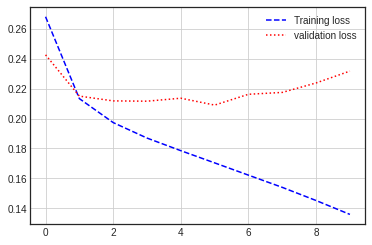

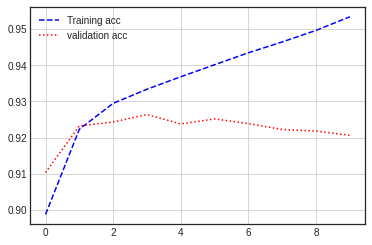

In [107]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label = 'Training loss')
plt.plot(val_loss, 'r:', label = 'validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label = 'Training acc')
plt.plot(val_acc, 'r:', label = 'validation acc')
plt.legend()
plt.grid()

plt.show()

# 오버피팅 되긴하는데 미세하지?
# 콜백써서 그런가봄

#### 감정 예측

In [108]:
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen = max_len)
    score = float(loaded_model.predict(new_pad))

    if score > 0.5:
        print('{} -> 긍정({:.2f}%)'.format(new_sentence, score*100))
    else:
        print('{} -> 부정({:.2f}%)'.format(new_sentence, (1-score)*100))

In [110]:
sentiment_predict('배달좀 느린듯ㅋ')
sentiment_predict('끝부분이 살짝 스크레치가 있긴한데 이정도면 괜찮은듯')
sentiment_predict('이거 사는 흑우 없제?ㅋㅋ')
sentiment_predict('잉 기무릥ㅋ')
sentiment_predict('배달이 좀 느리긴한데 이정도면 괜찮은듯ㅋ')
# sentiment_predict('돈주고보는사람없제?')
# sentiment_predict('ㄹㅇ핵노잼ㅋㅋ')

배달좀 느린듯ㅋ -> 부정(60.08%)
끝부분이 살짝 스크레치가 있긴한데 이정도면 괜찮은듯 -> 긍정(59.77%)
이거 사는 흑우 없제?ㅋㅋ -> 부정(73.54%)
잉 기무릥ㅋ -> 부정(56.34%)
배달이 좀 느리긴한데 이정도면 괜찮은듯ㅋ -> 긍정(90.41%)
